
# <center> Insurance Claim Fraud Detection
    
## Project Description

    Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Independent Variables

    1.	months_as_customer: Number of months of patronage
    2.	age: the length of time a customer has lived or a thing has existed
    3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
    4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
    5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
    6.	policy_csl: is basically Combined Single Limit
    7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
    8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
    9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
    10.	insured_zip: It is the zip code where the insurance was made
    11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
    12.	insured_education_level: This refers to the Level of education of the customer
    13.	insured_occupation: This refers Occupation of the customer
    14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
    15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
    16.	capital-gains: This refers to profit accrued due to insurance premium
    17.	capital-loss: This refers to the losses incurred due to insurance claims
    18.	incident_date: This refers to the date which claims where made by customers
    19.	incident_type: This refers to the type of claim/vehicle damage made by customer
    20.	collision_type: This refers to the area of damage on the vehicle
    21.	incident_severity: This refers to the extent/level of damage
    22.	authorities_contacted: This refers to the government agencies that were contacted after damage
    23.	incident_state: This refers to the state at which the accident happened
    24.	incident_city: This refers to the city at which the accident happened
    25.	1ncident_location: This refers to the location at which the accident happened
    26.	incident_hour_of_the_day: The period of the day which accident took place
    27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
    28.	property_damage: This refers to whether property was damaged or not
    29.	bodily_injuries: This refers to injuries sustained
    30.	witnesses: This refers to the number of witnesses involved
    31.	police_report_available: This refers to whether the report on damage was documented or not
    32.	total_claim_amount: This refers to the financial implications involved in claims
    33.	injury_claim: This refers to physical injuries sustained
    34.	property_claim: This refers to property damages during incident
    35.	vehicle_claim: This refers to property damages during incident
    36.	auto_make: This refers to the make of the vehicle
    37.	auto_model: This refers to the model of the vehicle
    38.	auto_year: This refers to the year which the vehicle was manufactured
    39.	_c39:
    40.	fraud_reported

Dataset Link-  
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv


## Data Collection and processing

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# loading the dataset to pandas DataFrame
data = pd.read_csv('Automobile_insurance_fraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(1000, 40)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [7]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
data.shape

(1000, 40)

In [9]:
# Assuming the column you want to encode is 'RainTomorrow'
data['fraud_reported'] = data['fraud_reported'].replace({'N': 0, 'Y': 1})


In [10]:
# Assuming you want to drop the 'Location' column
data.drop(columns=['_c39'], inplace=True)


In [11]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

In [12]:
df = numerical_data

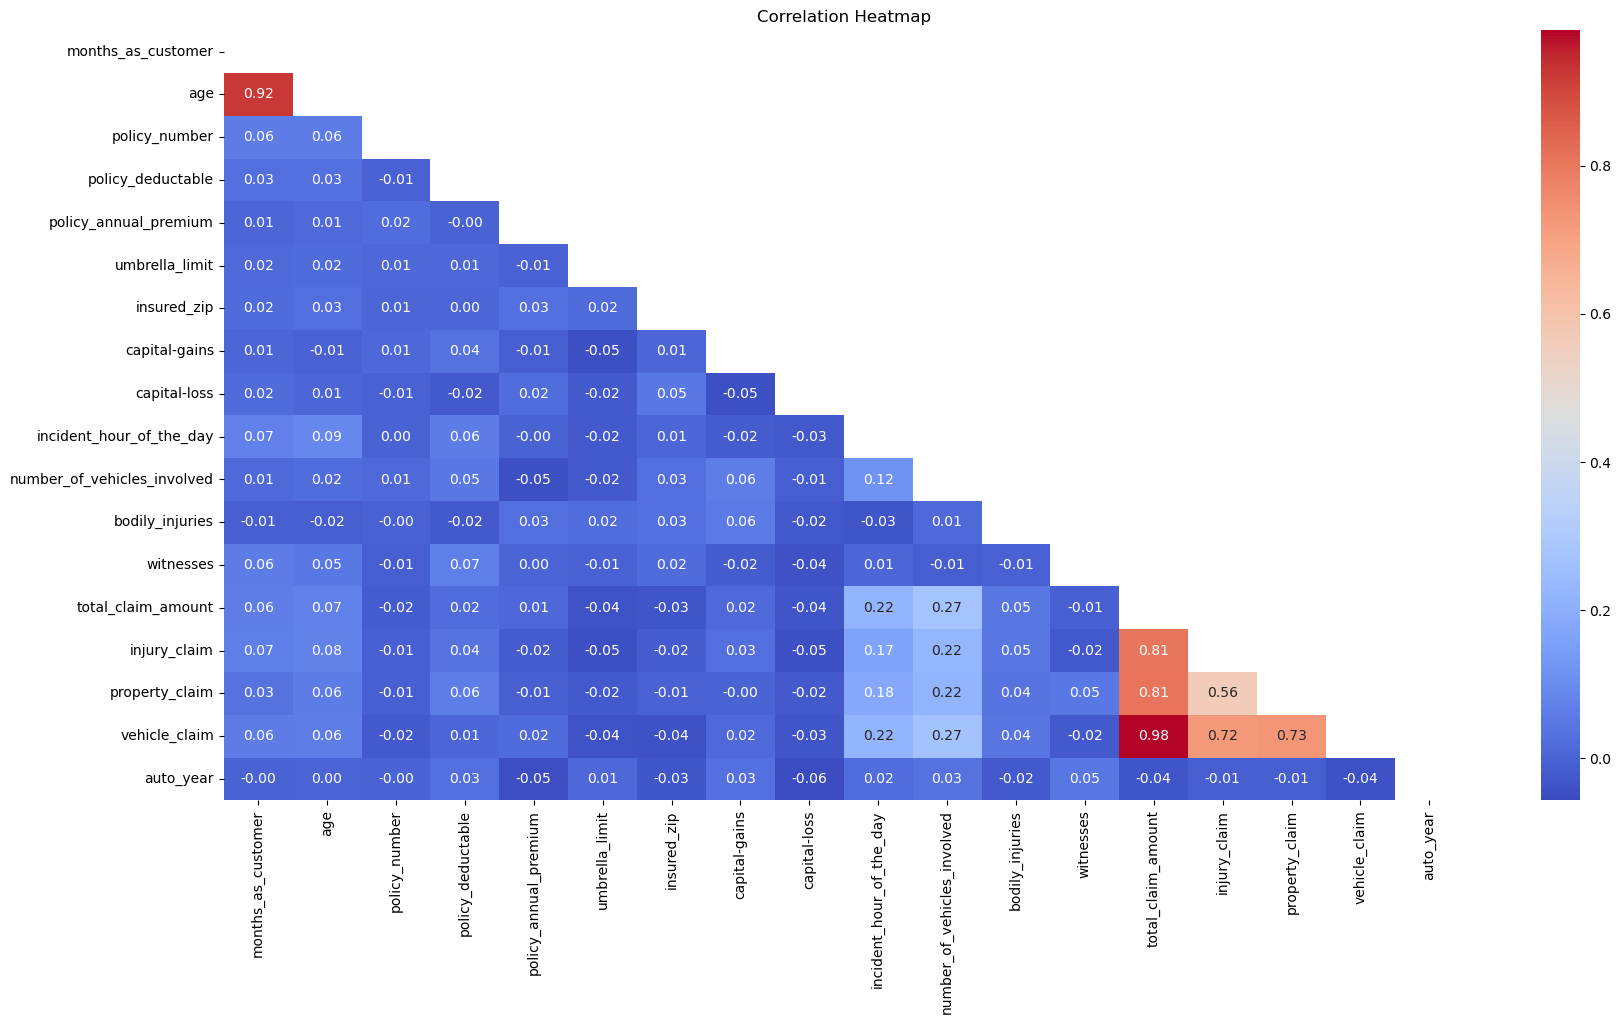

Features to remove:  {'vehicle_claim', 'age', 'property_claim', 'injury_claim'}
Summary after removing multicollinearity:


,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,203.954000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,2005.103000,0.247000
std,115.113174,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,6.015861,0.431483
min,0.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,1995.000000,0.000000
25%,115.750000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,2000.000000,0.000000
50%,199.500000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,2005.000000,0.000000
75%,276.250000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,2010.000000,0.000000
max,479.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,2015.000000,1.000000


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # Calculate the correlation matrix
correlation_matrix = df.drop('fraud_reported', axis=1).corr()

# # Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Find features with high correlation
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)
print("Features to remove: ",high_corr_features)

# Remove highly correlated features
df = df.drop(high_corr_features, axis=1)

# Print summary after removing multicollinearity
print("Summary after removing multicollinearity:")
df.describe()


In [14]:
# separarting the data and label
X = df.drop(columns=['fraud_reported'], axis=1)
Y = df['fraud_reported']

### Train Test Split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 14) (900, 14) (100, 14)


### Training the model: Support Vector Machine Model

In [17]:
# classifier = svm.SVC(kernel='linear')
classifier = LogisticRegression()

In [18]:
# training the support Vector Machine model
classifier.fit(X_train, Y_train)

C:\Users\AADERSHI MOHAN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

In [19]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [20]:
print('Accuracy on training data: ', training_data_accuracy)

Accuracy on training data:  0.7522222222222222


In [21]:
# accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [22]:
print('Accuracy on test data: ', test_data_accuracy)

Accuracy on test data:  0.75


In [25]:
import joblib  # Import joblib directly

# Save the trained model
joblib.dump(classifier, 'model.pkl')

['model.pkl']

In [26]:
import joblib

loaded_model = joblib.load('model.pkl')
print('Loaded Model', loaded_model)

Loaded Model LogisticRegression()


In [27]:
import pandas as pd
import joblib

# Load the test dataset
test_df =   df.copy()

# Assuming the test dataset has the same features as the training dataset (except the target variable)
X_test = test_df.drop('fraud_reported', axis=1)  # Features

X_test = X_test.sample(1)

# Load the trained model
loaded_model = joblib.load('model.pkl')

# Use the loaded model to make predictions on the test dataset
predictions = loaded_model.predict(X_test)

# Print the predictions
print("Predictions for the test dataset:")
print(predictions)


Predictions for the test dataset:
[0]
